### Создание таблицы


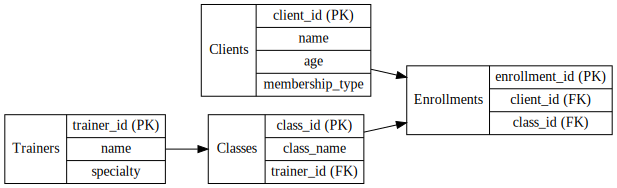

In [ ]:
# Создаем объект графа
db_er_diagram_m2m = Digraph(comment="Gym Database ER Diagram")
db_er_diagram_m2m.attr(rankdir="LR", size="10")

# Определяем стили для таблиц
db_er_diagram_m2m.attr("node", shape="record")

# Таблица Clients
db_er_diagram_m2m.node("Clients", '''{
    Clients | { client_id (PK) | name | age | membership_type }
}''')

# Таблица Trainers
db_er_diagram_m2m.node("Trainers", '''{
    Trainers | { trainer_id (PK) | name | specialty }
}''')

# Таблица Classes
db_er_diagram_m2m.node("Classes", '''{
    Classes | { class_id (PK) | class_name | trainer_id (FK) }
}''')

# Таблица Enrollments
db_er_diagram_m2m.node("Enrollments", '''{
    Enrollments | { enrollment_id (PK) | client_id (FK) | class_id (FK) }
}''')

db_er_diagram_m2m.edge("Clients", "Enrollments")
db_er_diagram_m2m.edge("Classes", "Enrollments")
db_er_diagram_m2m.edge("Trainers", "Classes")

# Отображение диаграммы
db_er_diagram_m2m

In [ ]:
# Установка необходимых библиотек
import sqlite3

# Создание подключения к базе данных
conn = sqlite3.connect('gym.db')
cursor = conn.cursor()

# Создание таблиц
# Таблица клиентов
cursor.execute('''
CREATE TABLE Clients (
    client_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age INTEGER,
    membership_type TEXT NOT NULL
)
''')

# Таблица тренеров
cursor.execute('''
CREATE TABLE Trainers (
    trainer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    specialty TEXT NOT NULL
)
''')

# Таблица занятий
cursor.execute('''
CREATE TABLE Classes (
    class_id INTEGER PRIMARY KEY AUTOINCREMENT,
    class_name TEXT NOT NULL,
    trainer_id INTEGER,
    FOREIGN KEY (trainer_id) REFERENCES Trainers(trainer_id)
)
''')

# Таблица записей на занятия
cursor.execute('''
CREATE TABLE Enrollments (
    enrollment_id INTEGER PRIMARY KEY AUTOINCREMENT,
    client_id INTEGER,
    class_id INTEGER,
    FOREIGN KEY (client_id) REFERENCES Clients(client_id),
    FOREIGN KEY (class_id) REFERENCES Classes(class_id)
)
''')

### Заполнение таблицы

In [ ]:
# Заполнение таблиц данными
clients = [
    ('Alice', 25, 'Gold'),
    ('Bob', 30, 'Silver'),
    ('Charlie', 22, 'Gold'),
    ('David', 35, 'Platinum'),
    ('Eva', 28, 'Silver'),
    ('Frank', 40, 'Gold'),
    ('Grace', 31, 'Silver'),
    ('Hannah', 26, 'Gold'),
    ('Ian', 29, 'Platinum'),
    ('Jack', 24, 'Silver'),
    ('Kate', 32, 'Gold'),
    ('Liam', 27, 'Silver'),
    ('Mia', 23, 'Gold'),
    ('Noah', 36, 'Platinum'),
    ('Olivia', 30, 'Silver'),
    ('Peter', 38, 'Gold'),
    ('Quinn', 29, 'Silver'),
    ('Ryan', 34, 'Gold'),
    ('Sophia', 26, 'Silver'),
    ('Tom', 33, 'Platinum')
]

trainers = [
    ('Michael', 'Yoga'),
    ('Sarah', 'Weightlifting'),
    ('Tom', 'Cardio'),
    ('Anna', 'Pilates'),
    ('Lily', 'Dance'),
    ('James', 'Boxing'),
    ('Ella', 'Zumba'),
    ('Oliver', 'HIIT')
]

classes = [
    ('Morning Yoga', 1),
    ('Evening Weightlifting', 2),
    ('Cardio Blast', 3),
    ('Pilates for Beginners', 4),
    ('Dance Party', 5),
    ('Boxing Basics', 6),
    ('Zumba Fun', 7),
    ('HIIT Challenge', 8),
    ('Advanced Yoga', 1),
    ('Strength Training', 2),
    ('Cardio Kickboxing', 3),
    ('Dance Fusion', 5),
    ('Power Yoga', 1),
    ('Functional Training', 2),
    ('Zumba Gold', 7),
    ('Kickboxing', 6),
    ('Pilates Advanced', 4),
    ('Cardio Dance', 5),
    ('Strength & Conditioning', 2),
    ('Yoga & Mindfulness', 1)
]

enrollments = [
    (1, 1),
    (2, 2),
    (3, 3),
    (4, 4),
    (5, 1),
    (6, 2),
    (7, 3),
    (8, 4),
    (9, 1),
    (10, 2),
    (11, 5),
    (12, 6),
    (13, 7),
    (14, 8),
    (15, 1),
    (16, 2),
    (17, 3),
    (18, 4),
    (19, 5),
    (20, 6),
    (1, 8),
    (2, 5),
    (3, 7),
    (4, 6),
    (5, 8),
    (6, 3),
    (7, 4),
    (8, 1),
    (9, 7),
    (10, 8),
    (11, 6),
    (12, 5),
    (13, 4),
    (14, 3),
    (15, 2),
    (16, 1),
    (17, 8),
    (18, 7),
    (19, 6),
    (20, 5)
]

# Вставка данных в таблицы
cursor.executemany('INSERT INTO Clients (name, age, membership_type) VALUES (?, ?, ?)', clients)
cursor.executemany('INSERT INTO Trainers (name, specialty) VALUES (?, ?)', trainers)
cursor.executemany('INSERT INTO Classes (class_name, trainer_id) VALUES (?, ?)', classes)
cursor.executemany('INSERT INTO Enrollments (client_id, class_id) VALUES (?, ?)', enrollments)

# Сохранение изменений и закрытие соединения
conn.commit()
conn.close()

## Задание 2. (50 баллов) SQL запросы к БД.

### 1. Простые запросы к 1 таблице

In [ ]:
import sqlite3

# Получить всех клиентов
with sqlite3.connect('gym.db') as conn:
    clients = conn.execute('SELECT * FROM Clients').fetchall()

    # Проверка на наличие клиентов
    if clients:
        print("Все клиенты:")
        for client in clients:
            print(f"ID: {client[0]}, Имя: {client[1]}, Возраст: {client[2]}, Членство: {client[3]}")
    else:
        print("Клиенты не найдены.")

Все клиенты:
ID: 1, Имя: Alice, Возраст: 25, Членство: Gold
ID: 2, Имя: Bob, Возраст: 30, Членство: Silver
ID: 3, Имя: Charlie, Возраст: 22, Членство: Gold
ID: 4, Имя: David, Возраст: 35, Членство: Platinum
ID: 5, Имя: Eva, Возраст: 28, Членство: Silver
ID: 6, Имя: Frank, Возраст: 40, Членство: Gold
ID: 7, Имя: Grace, Возраст: 31, Членство: Silver
ID: 8, Имя: Hannah, Возраст: 26, Членство: Gold
ID: 9, Имя: Ian, Возраст: 29, Членство: Platinum
ID: 10, Имя: Jack, Возраст: 24, Членство: Silver
ID: 11, Имя: Kate, Возраст: 32, Членство: Gold
ID: 12, Имя: Liam, Возраст: 27, Членство: Silver
ID: 13, Имя: Mia, Возраст: 23, Членство: Gold
ID: 14, Имя: Noah, Возраст: 36, Членство: Platinum
ID: 15, Имя: Olivia, Возраст: 30, Членство: Silver
ID: 16, Имя: Peter, Возраст: 38, Членство: Gold
ID: 17, Имя: Quinn, Возраст: 29, Членство: Silver
ID: 18, Имя: Ryan, Возраст: 34, Членство: Gold
ID: 19, Имя: Sophia, Возраст: 26, Членство: Silver
ID: 20, Имя: Tom, Возраст: 33, Членство: Platinum


In [ ]:
# Получить клиентов с золотым членством
with sqlite3.connect('gym.db') as conn:
    gold_clients = conn.execute('SELECT * FROM Clients WHERE membership_type = "Gold"').fetchall()

    # Проверка на наличие клиентов с золотым членством
    if gold_clients:
        print("Клиенты с золотым членством:")
        for client in gold_clients:
            print(f"ID: {client[0]}, Имя: {client[1]}, Возраст: {client[2]}, Членство: {client[3]}")
    else:
        print("Клиенты с золотым членством не найдены.")

Клиенты с золотым членством:
ID: 1, Имя: Alice, Возраст: 25, Членство: Gold
ID: 3, Имя: Charlie, Возраст: 22, Членство: Gold
ID: 6, Имя: Frank, Возраст: 40, Членство: Gold
ID: 8, Имя: Hannah, Возраст: 26, Членство: Gold
ID: 11, Имя: Kate, Возраст: 32, Членство: Gold
ID: 13, Имя: Mia, Возраст: 23, Членство: Gold
ID: 16, Имя: Peter, Возраст: 38, Членство: Gold
ID: 18, Имя: Ryan, Возраст: 34, Членство: Gold


### Запросы с использованием JOIN к 2 таблицам

In [ ]:
# Подключение к базе данных
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Получить занятия и тренеров
    cursor.execute('''
    SELECT Classes.class_name, Trainers.name
    FROM Classes
    JOIN Trainers ON Classes.trainer_id = Trainers.trainer_id
    ''')
    class_trainer = cursor.fetchall()

    if class_trainer:
        print("Занятия и тренеры:")
        for ct in class_trainer:
            print(f"Занятие: {ct[0]}, Тренер: {ct[1]}")
    else:
        print("Нет занятий и тренеров.")

Занятия и тренеры:
Занятие: Morning Yoga, Тренер: Michael
Занятие: Evening Weightlifting, Тренер: Sarah
Занятие: Cardio Blast, Тренер: Tom
Занятие: Pilates for Beginners, Тренер: Anna
Занятие: Dance Party, Тренер: Lily
Занятие: Boxing Basics, Тренер: James
Занятие: Zumba Fun, Тренер: Ella
Занятие: HIIT Challenge, Тренер: Oliver
Занятие: Advanced Yoga, Тренер: Michael
Занятие: Strength Training, Тренер: Sarah
Занятие: Cardio Kickboxing, Тренер: Tom
Занятие: Dance Fusion, Тренер: Lily
Занятие: Power Yoga, Тренер: Michael
Занятие: Functional Training, Тренер: Sarah
Занятие: Zumba Gold, Тренер: Ella
Занятие: Kickboxing, Тренер: James
Занятие: Pilates Advanced, Тренер: Anna
Занятие: Cardio Dance, Тренер: Lily
Занятие: Strength & Conditioning, Тренер: Sarah
Занятие: Yoga & Mindfulness, Тренер: Michael


In [ ]:
# Получить записи на занятия и информацию о клиентах
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT Enrollments.enrollment_id, Clients.name, Classes.class_name
    FROM Enrollments
    JOIN Clients ON Enrollments.client_id = Clients.client_id
    JOIN Classes ON Enrollments.class_id = Classes.class_id
    ''')
    enrollment_info = cursor.fetchall()

    if enrollment_info:
        print("Записи на занятия и клиенты:")
        for ei in enrollment_info:
            print(f"Запись ID: {ei[0]}, Клиент: {ei[1]}, Занятие: {ei[2]}")
    else:
        print("Нет записей на занятия.")

Записи на занятия и клиенты:
Запись ID: 1, Клиент: Alice, Занятие: Morning Yoga
Запись ID: 2, Клиент: Bob, Занятие: Evening Weightlifting
Запись ID: 3, Клиент: Charlie, Занятие: Cardio Blast
Запись ID: 4, Клиент: David, Занятие: Pilates for Beginners
Запись ID: 5, Клиент: Eva, Занятие: Morning Yoga
Запись ID: 6, Клиент: Frank, Занятие: Evening Weightlifting
Запись ID: 7, Клиент: Grace, Занятие: Cardio Blast
Запись ID: 8, Клиент: Hannah, Занятие: Pilates for Beginners
Запись ID: 9, Клиент: Ian, Занятие: Morning Yoga
Запись ID: 10, Клиент: Jack, Занятие: Evening Weightlifting
Запись ID: 11, Клиент: Kate, Занятие: Dance Party
Запись ID: 12, Клиент: Liam, Занятие: Boxing Basics
Запись ID: 13, Клиент: Mia, Занятие: Zumba Fun
Запись ID: 14, Клиент: Noah, Занятие: HIIT Challenge
Запись ID: 15, Клиент: Olivia, Занятие: Morning Yoga
Запись ID: 16, Клиент: Peter, Занятие: Evening Weightlifting
Запись ID: 17, Клиент: Quinn, Занятие: Cardio Blast
Запись ID: 18, Клиент: Ryan, Занятие: Pilates for B

### Запрос с использованием JOIN к 3 таблицам

In [ ]:
# Получить занятия, тренеров и клиентов
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT Clients.name, Classes.class_name, Trainers.name
    FROM Enrollments
    JOIN Clients ON Enrollments.client_id = Clients.client_id
    JOIN Classes ON Enrollments.class_id = Classes.class_id
    JOIN Trainers ON Classes.trainer_id = Trainers.trainer_id
    ''')
    client_class_trainer = cursor.fetchall()

    if client_class_trainer:
        print("Клиенты, занятия и тренеры:")
        for cct in client_class_trainer:
            print(f"Клиент: {cct[0]}, Занятие: {cct[1]}, Тренер: {cct[2]}")
    else:
        print("Нет информации о клиентах, занятиях и тренерах.")

Клиенты, занятия и тренеры:
Клиент: Alice, Занятие: Morning Yoga, Тренер: Michael
Клиент: Bob, Занятие: Evening Weightlifting, Тренер: Sarah
Клиент: Charlie, Занятие: Cardio Blast, Тренер: Tom
Клиент: David, Занятие: Pilates for Beginners, Тренер: Anna
Клиент: Eva, Занятие: Morning Yoga, Тренер: Michael
Клиент: Frank, Занятие: Evening Weightlifting, Тренер: Sarah
Клиент: Grace, Занятие: Cardio Blast, Тренер: Tom
Клиент: Hannah, Занятие: Pilates for Beginners, Тренер: Anna
Клиент: Ian, Занятие: Morning Yoga, Тренер: Michael
Клиент: Jack, Занятие: Evening Weightlifting, Тренер: Sarah
Клиент: Kate, Занятие: Dance Party, Тренер: Lily
Клиент: Liam, Занятие: Boxing Basics, Тренер: James
Клиент: Mia, Занятие: Zumba Fun, Тренер: Ella
Клиент: Noah, Занятие: HIIT Challenge, Тренер: Oliver
Клиент: Olivia, Занятие: Morning Yoga, Тренер: Michael
Клиент: Peter, Занятие: Evening Weightlifting, Тренер: Sarah
Клиент: Quinn, Занятие: Cardio Blast, Тренер: Tom
Клиент: Ryan, Занятие: Pilates for Beginners

### Запросы с использованием GROUP BY

In [ ]:
# Количество клиентов по типам членства
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT membership_type, COUNT(client_id) AS num_clients
    FROM Clients
    GROUP BY membership_type
    ''')
    membership_count = cursor.fetchall()

    if membership_count:
        print("Количество клиентов по типам членства:")
        for mc in membership_count:
            print(f"Тип членства: {mc[0]}, Количество клиентов: {mc[1]}")
    else:
        print("Нет данных по типам членства.")

Количество клиентов по типам членства:
Тип членства: Gold, Количество клиентов: 8
Тип членства: Platinum, Количество клиентов: 4
Тип членства: Silver, Количество клиентов: 8


In [ ]:
# Средний возраст клиентов по типам членства
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT membership_type, AVG(age) AS avg_age
    FROM Clients
    GROUP BY membership_type
    ''')
    avg_age_membership = cursor.fetchall()

    if avg_age_membership:
        print("Средний возраст клиентов по типам членства:")
        for a in avg_age_membership:
            print(f"Тип членства: {a[0]}, Средний возраст: {a[1]:.2f}")
    else:
        print("Нет данных о среднем возрасте клиентов.")

Средний возраст клиентов по типам членства:
Тип членства: Gold, Средний возраст: 30.00
Тип членства: Platinum, Средний возраст: 33.25
Тип членства: Silver, Средний возраст: 28.12


### Запросы с использованием HAVING

In [ ]:
# Типы членства с более чем 5 клиентами
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT membership_type, COUNT(client_id) AS num_clients
    FROM Clients
    GROUP BY membership_type
    HAVING COUNT(client_id) > 5
    ''')
    membership_having = cursor.fetchall()

    if membership_having:
        print("Типы членства с более чем 5 клиентами:")
        for mh in membership_having:
            print(f"Тип членства: {mh[0]}, Количество клиентов: {mh[1]}")
    else:
        print("Нет типов членства с более чем 5 клиентами.")

Типы членства с более чем 5 клиентами:
Тип членства: Gold, Количество клиентов: 8
Тип членства: Silver, Количество клиентов: 8


In [ ]:
# Занятия с количеством клиентов более 4
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT Classes.class_name, COUNT(Enrollments.client_id) AS num_clients
    FROM Classes
    LEFT JOIN Enrollments ON Classes.class_id = Enrollments.class_id
    GROUP BY Classes.class_name
    HAVING COUNT(Enrollments.client_id) > 4
    ''')
    class_having = cursor.fetchall()

    if class_having:
        print("Занятия с количеством клиентов более 4:")
        for ch in class_having:
            print(f"Занятие: {ch[0]}, Количество клиентов: {ch[1]}")
    else:
        print("Нет занятий с количеством клиентов более 4.")

Занятия с количеством клиентов более 4:
Занятие: Boxing Basics, Количество клиентов: 5
Занятие: Cardio Blast, Количество клиентов: 5
Занятие: Dance Party, Количество клиентов: 5
Занятие: Evening Weightlifting, Количество клиентов: 5
Занятие: HIIT Challenge, Количество клиентов: 5
Занятие: Morning Yoga, Количество клиентов: 6
Занятие: Pilates for Beginners, Количество клиентов: 5


### Запросы с использованием ORDER BY

In [ ]:
# Список клиентов по имени
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('SELECT * FROM Clients ORDER BY name')
    ordered_clients = cursor.fetchall()

    if ordered_clients:
        print("Клиенты по имени:")
        for oc in ordered_clients:
            print(f"ID: {oc[0]}, Имя: {oc[1]}, Возраст: {oc[2]}, Членство: {oc[3]}")
    else:
        print("Нет клиентов.")

Клиенты по имени:
ID: 1, Имя: Alice, Возраст: 25, Членство: Gold
ID: 2, Имя: Bob, Возраст: 30, Членство: Silver
ID: 3, Имя: Charlie, Возраст: 22, Членство: Gold
ID: 4, Имя: David, Возраст: 35, Членство: Platinum
ID: 5, Имя: Eva, Возраст: 28, Членство: Silver
ID: 6, Имя: Frank, Возраст: 40, Членство: Gold
ID: 7, Имя: Grace, Возраст: 31, Членство: Silver
ID: 8, Имя: Hannah, Возраст: 26, Членство: Gold
ID: 9, Имя: Ian, Возраст: 29, Членство: Platinum
ID: 10, Имя: Jack, Возраст: 24, Членство: Silver
ID: 11, Имя: Kate, Возраст: 32, Членство: Gold
ID: 12, Имя: Liam, Возраст: 27, Членство: Silver
ID: 13, Имя: Mia, Возраст: 23, Членство: Gold
ID: 14, Имя: Noah, Возраст: 36, Членство: Platinum
ID: 15, Имя: Olivia, Возраст: 30, Членство: Silver
ID: 16, Имя: Peter, Возраст: 38, Членство: Gold
ID: 17, Имя: Quinn, Возраст: 29, Членство: Silver
ID: 18, Имя: Ryan, Возраст: 34, Членство: Gold
ID: 19, Имя: Sophia, Возраст: 26, Членство: Silver
ID: 20, Имя: Tom, Возраст: 33, Членство: Platinum


In [ ]:
# Занятия по количеству клиентов (по убыванию)
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    cursor.execute('''
    SELECT Classes.class_name, COUNT(Enrollments.client_id) AS num_clients
    FROM Classes
    LEFT JOIN Enrollments ON Classes.class_id = Enrollments.class_id
    GROUP BY Classes.class_name
    ORDER BY num_clients DESC
    ''')
    ordered_classes = cursor.fetchall()

    if ordered_classes:
        print("Занятия по количеству клиентов:")
        for oc in ordered_classes:
            print(f"Занятие: {oc[0]}, Количество клиентов: {oc[1]}")
    else:
        print("Нет занятий.")

Занятия по количеству клиентов:
Занятие: Morning Yoga, Количество клиентов: 6
Занятие: Pilates for Beginners, Количество клиентов: 5
Занятие: HIIT Challenge, Количество клиентов: 5
Занятие: Evening Weightlifting, Количество клиентов: 5
Занятие: Dance Party, Количество клиентов: 5
Занятие: Cardio Blast, Количество клиентов: 5
Занятие: Boxing Basics, Количество клиентов: 5
Занятие: Zumba Fun, Количество клиентов: 4
Занятие: Zumba Gold, Количество клиентов: 0
Занятие: Yoga & Mindfulness, Количество клиентов: 0
Занятие: Strength Training, Количество клиентов: 0
Занятие: Strength & Conditioning, Количество клиентов: 0
Занятие: Power Yoga, Количество клиентов: 0
Занятие: Pilates Advanced, Количество клиентов: 0
Занятие: Kickboxing, Количество клиентов: 0
Занятие: Functional Training, Количество клиентов: 0
Занятие: Dance Fusion, Количество клиентов: 0
Занятие: Cardio Kickboxing, Количество клиентов: 0
Занятие: Cardio Dance, Количество клиентов: 0
Занятие: Advanced Yoga, Количество клиентов: 

### Запросы с предикатами сравнения

In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Запрос с предикатом сравнения >
    cursor.execute('''
    SELECT name FROM Clients
    WHERE age > 30
    ''')
    clients_above_30 = cursor.fetchall()
    print("Клиенты старше 30 лет:")
    for client in clients_above_30:
        print(client[0])

    # Запрос с предикатом сравнения <=
    cursor.execute('''
    SELECT name FROM Clients
    WHERE age <= 25
    ''')
    clients_25_or_younger = cursor.fetchall()
    print("\nКлиенты 25 лет и младше:")
    for client in clients_25_or_younger:
        print(client[0])

Клиенты старше 30 лет:
David
Frank
Grace
Kate
Noah
Peter
Ryan
Tom

Клиенты 25 лет и младше:
Alice
Charlie
Jack
Mia


### Запросы с предикатами вхождения в множество IN

In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Запрос с IN для типов членства
    cursor.execute('''
    SELECT name FROM Clients
    WHERE membership_type IN ('Gold', 'Platinum')
    ''')
    gold_platinum_clients = cursor.fetchall()
    print("\nКлиенты с членством Gold или Platinum:")
    for client in gold_platinum_clients:
        print(client[0])

    # Запрос с IN для возрастов
    cursor.execute('''
    SELECT name FROM Clients
    WHERE age IN (22, 25, 30)
    ''')
    specific_age_clients = cursor.fetchall()
    print("\nКлиенты с возрастом 22, 25 или 30 лет:")
    for client in specific_age_clients:
        print(client[0])


Клиенты с членством Gold или Platinum:
Alice
Charlie
David
Frank
Hannah
Ian
Kate
Mia
Noah
Peter
Ryan
Tom

Клиенты с возрастом 22, 25 или 30 лет:
Alice
Bob
Charlie
Olivia


### Запросы с предикатами EXIST и NOT EXIST

In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Запрос с EXIST
    cursor.execute('''
    SELECT class_name FROM Classes c
    WHERE EXISTS (
        SELECT 1 FROM Enrollments e
        WHERE e.class_id = c.class_id
    )
    ''')
    classes_exist = cursor.fetchall()
    print("\nЗанятия, на которые есть записи:")
    for class_name in classes_exist:
        print(class_name[0])

    # Запрос с NOT EXIST
    cursor.execute('''
    SELECT class_name FROM Classes c
    WHERE NOT EXISTS (
        SELECT 1 FROM Enrollments e
        WHERE e.class_id = c.class_id
    )
    ''')
    classes_not_exist = cursor.fetchall()
    print("\nЗанятия, на которые нет записей:")
    for class_name in classes_not_exist:
        print(class_name[0])


Занятия, на которые есть записи:
Morning Yoga
Evening Weightlifting
Cardio Blast
Pilates for Beginners
Dance Party
Boxing Basics
Zumba Fun
HIIT Challenge

Занятия, на которые нет записей:
Advanced Yoga
Strength Training
Cardio Kickboxing
Dance Fusion
Power Yoga
Functional Training
Zumba Gold
Kickboxing
Pilates Advanced
Cardio Dance
Strength & Conditioning
Yoga & Mindfulness


### Запросы с агрегатными функциями

In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Запрос с COUNT
    cursor.execute('''
    SELECT COUNT(*) AS total_clients FROM Clients
    ''')
    total_clients = cursor.fetchone()
    print(f"\nОбщее количество клиентов: {total_clients[0]}")

    # Запрос с AVG
    cursor.execute('''
    SELECT AVG(age) AS average_age FROM Clients
    ''')
    average_age = cursor.fetchone()
    print(f"Средний возраст клиентов: {average_age[0]}")


Общее количество клиентов: 20
Средний возраст клиентов: 29.9


### Удаление записи в таблице

In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Удаление клиента по имени
    cursor.execute('''
    DELETE FROM Clients
    WHERE name = 'Jack'
    ''')
    conn.commit()
    print("\nЗапись клиента 'Jack' удалена.")


Запись клиента 'Jack' удалена.


In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Проверка всех клиентов
    cursor.execute('''
    SELECT name FROM Clients
    ''')
    all_clients = cursor.fetchall()

    print("\nСписок всех клиентов после удаления:")
    for client in all_clients:
        print(client[0])


Список всех клиентов после удаления:
Alice
Bob
Charlie
David
Eva
Frank
Grace
Hannah
Ian
Kate
Liam
Mia
Noah
Olivia
Peter
Quinn
Ryan
Sophia
Tom


### Изменение записи в таблице

In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Изменение типа членства клиента
    cursor.execute('''
    UPDATE Clients
    SET membership_type = 'Diamond'
    WHERE name = 'Olivia'
    ''')
    conn.commit()
    print("\nТип членства клиента 'Olivia' изменен на 'Diamond'.")


Тип членства клиента 'Olivia' изменен на 'Diamond'.


In [ ]:
with sqlite3.connect('gym.db') as conn:
    cursor = conn.cursor()

    # Проверка типа членства клиента 'Olivia'
    cursor.execute('''
    SELECT name, membership_type FROM Clients
    WHERE name = 'Olivia'
    ''')
    olivia_info = cursor.fetchone()

    if olivia_info:
        print(f"\nИмя: {olivia_info[0]}, Тип членства: {olivia_info[1]}")
    else:
        print("\nКлиент 'Olivia' не найден.")


Имя: Olivia, Тип членства: Diamond
